In [1]:
f(V) = abs(V)*sqrt(log(abs(V)+1)) + 0.01
function f′(V)
    if V == 0
        return 0
    else
        w = sqrt(log(abs(V)+1))
        V/(2* (abs(V)+1) * w) + (V >= 0 ? w : -w)
    end
end;

In [2]:
using PyPlot

In [3]:
function fnplot(f, xlist)
    plot(xlist, f.(xlist))
end;

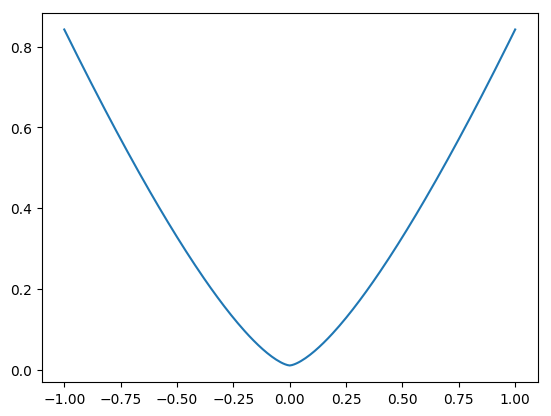

In [4]:
fnplot(f, -1:0.01:1);

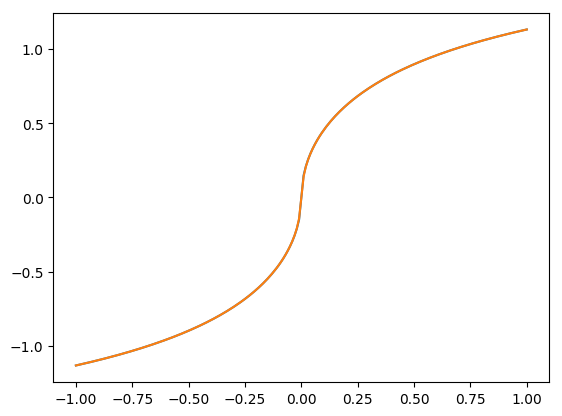

In [5]:
fnplot(f′, -1:0.01:1)
fnplot(x -> (f(x+0.01)-f(x-0.01))/0.02, -1:0.01:1);

In [6]:
per1(V) = 2f(V/2)
@assert per1(5) ≈ 2f(2.5)

In [7]:
per212(V₁, V₂) = per1(V₁) + per1(V₁+V₂)
@assert per212(3,4) ≈ 2f(1.5) + 2f(3.5)

In [8]:
function per12(V₁, V₂)
    Ṽmin = -(V₁ + V₂)/2
    Ṽmax = -V₁
    Ṽ = (Ṽmin + Ṽmax)/2
    Ṽold = nothing
    while Ṽ != Ṽold
        test = f′(Ṽ) + f′(Ṽ+V₁) + f′(Ṽ+V₁+V₂)
        if test < 0
            Ṽmin = Ṽ
        elseif test > 0
            Ṽmax = Ṽ
        else
            break
        end
        Ṽold = Ṽ
        Ṽ = (Ṽmin + Ṽmax)/2
    end
    f(Ṽ) + f(Ṽ+V₁) + f(Ṽ+V₁+V₂)
end;    

In [9]:
@assert per12(6,6) ≈ f(0)+2f(6)
@assert per12(0.01,0.01) ≈ f(0)+2f(0.01)
@assert per12(10000,10000) ≈ f(0)+2f(10000)
@assert per12(3,4) ≈ minimum([f(Ṽ) + f(Ṽ+3) + f(Ṽ+7) for Ṽ in -7.5:0.0001:-3])
@assert per12(0.02,0.08) ≈ minimum([f(Ṽ) + f(Ṽ+0.02) + f(Ṽ+0.1) for Ṽ in -0.05:0.00001:-0.02])
@assert per12(3000,50000) ≈ minimum([f(Ṽ) + f(Ṽ+3000) + f(Ṽ+53000) for Ṽ in -26500:0.01:-3000])
@assert per12(0.6,700) ≈ minimum([f(Ṽ) + f(Ṽ+0.6) + f(Ṽ+700.6) for Ṽ in -350.3:0.001:-0.6])

In [10]:
function makelist(min, max, num)
    h = (max - min)/num
    linspace(min+h/2, max-h/2, num), linspace(min, max, num)
end;

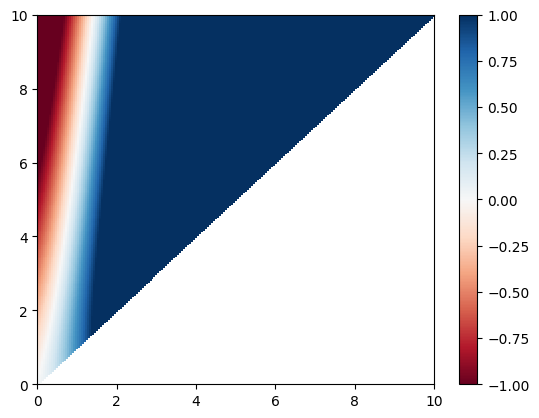

In [11]:
V₁list, V₁axis = makelist(0, 10, 200)
V₂list, V₂axis = makelist(0, 10, 200)

M = [[V₁≤V₂ ? per212(V₁,V₂) - per12(V₁,V₂) : NaN for V₁ in V₁list] for V₂ in V₂list]
pcolormesh(V₁axis, V₂axis, M, cmap="RdBu", vmin=-1, vmax=1)
colorbar();

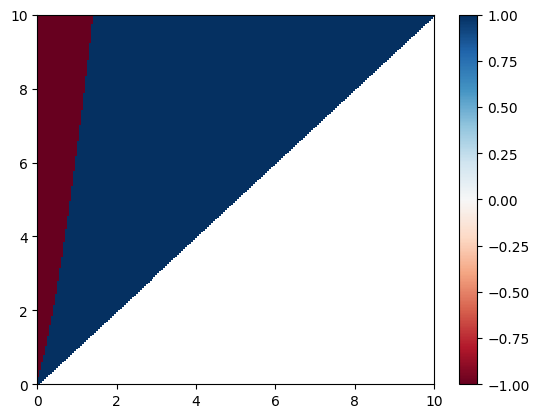

In [12]:
V₁list, V₁axis = makelist(0, 10, 200)
V₂list, V₂axis = makelist(0, 10, 200)

M = [[V₁≤V₂ ? sign(per212(V₁,V₂) - per12(V₁,V₂)) : NaN for V₁ in V₁list] for V₂ in V₂list]
pcolormesh(V₁axis, V₂axis, M, cmap="RdBu", vmin=-1, vmax=1)
colorbar();

In [13]:
per32123(V₁, V₂, V₃) = per1(V₁) + per1(V₁+V₂) + per1(V₁+V₂+V₃);

In [14]:
per3123(V₁, V₂, V₃) = per12(V₁,V₂) + per1(V₁+V₂+V₃);

In [15]:
per2313(V₁, V₂, V₃) = f′(V₃+V₁/2) > f′(V₂+V₁/2) + f′(V₁/2) ? per12(V₂,V₁+V₃) + per1(V₁) : NaN;

In [16]:
function per213(V₁, V₂, V₃)
    Ṽmin = -(V₁ + V₂ + V₃)
    Ṽmax = 0
    Ṽ = (Ṽmin + Ṽmax)/2
    Ṽold = nothing
    while Ṽ != Ṽold
        test = f′(Ṽ) + f′(Ṽ+V₂) + f′(Ṽ+V₂+V₁) + f′(Ṽ+V₂+V₁+V₃)
        if test < 0
            Ṽmin = Ṽ
        elseif test > 0
            Ṽmax = Ṽ
        else
            break
        end
        Ṽold = Ṽ
        Ṽ = (Ṽmin + Ṽmax)/2
    end
    f(Ṽ) + f(Ṽ+V₂) + f(Ṽ+V₂+V₁) + f(Ṽ+V₂+V₁+V₃)
end;  

In [19]:
per213(5, 100, 500), per3123(5, 100, 500), per2313(5, 100, 500), per32123(5, 100, 500)

(1479.6294773685759, 1667.8737745013977, NaN, 1661.4875997455338)

In [20]:
per213(5, 40, 2000), per3123(5, 40, 2000), per2313(5, 40, 2000), per32123(5, 40, 2000)

(5608.7794571590475, 5467.624980345328, NaN, 5469.434727103139)

In [18]:
per213(0.01, 100, 1500), per3123(0.01, 100, 1500), per2313(0.01, 100, 1500), per32123(0.01, 100, 1500)

(4271.5195673204635, 4351.321033699406, 4271.516820351916, 4335.524203517638)

In [21]:
per213(2, 80, 2500), per3123(2, 80, 2500), per2313(2, 80, 2500), per32123(2, 80, 2500)

(7167.50328727043, 7080.5694767036275, NaN, 7071.121166682394)

In [17]:
function compare(V₁, V₂, V₃, threshold)
    if !(V₁≤V₂≤V₃)
        return NaN
    end
    candidates = [per213(V₁, V₂, V₃), per3123(V₁, V₂, V₃), per2313(V₁, V₂, V₃), per32123(V₁, V₂, V₃)]
    val, pos = findmin(candidates)
    for i = 1:4
        if i != pos && !isnan(candidates[i]) && candidates[i] <= val + threshold
            return NaN
        end
    end
    return pos
end;

In [18]:
function crosssect(V₁, V₂max, V₃max, px, threshold)
    V₂list, V₂axis = makelist(0, V₂max, px)
    V₃list, V₃axis = makelist(0, V₃max, px)     

    M = [[compare(V₁, V₂, V₃, threshold) for V₂ in V₂list] for V₃ in V₃list]
    a = pcolormesh(V₂axis, V₃axis, M, vmin=1, vmax=4)
    title("V₁ = $V₁")
    xlabel("V₂")
    ylabel("V₃")
    colorbar()
    return [a]
end;

In [19]:
# From https://genkuroki.github.io/documents/Jupyter/20170624%20Examples%20of%20animations%20in%20Julia%20by%20PyPlot%20and%20matplotlib.animation.html

V₁list = logspace(-3, 1.5, 200)
V₂max(V₁) = 150
V₃max(V₁) = 3000
px = 400
threshold = 1e-4
frametime = 100

using PyCall
@pyimport matplotlib.animation as anim
using PyPlot

function showanim(filename)
    base64_video = base64encode(open(filename))
    display("text/html", """<video controls src="data:video/x-m4v;base64,$base64_video">""")
end

fig = figure(figsize=(8,6))

function draw(V₁)
    crosssect(V₁, V₂max(V₁), V₃max(V₁), px, threshold)
end

# i=0,1,...,frames-1
function animate(i)
    clf()
    draw(V₁list[i+1])
end

function init()
    draw(V₁list[1])
end

withfig(fig) do
    myanim = anim.FuncAnimation(fig, animate, frames=length(V₁list), init_func=init, interval=frametime, blit=true)
    myanim[:save]("triple2.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

showanim("triple2.mp4")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAElwJtZGF0AAACrwYF//+r3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY0MyA1YzY1NzA0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE5IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAOTlliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwA6NhvfH/JlOuo6AAADAAepFM2jLcf2/Q2D9AAK+W00QY6i4utmjvreEWZ8wJo3SLPRBoJYzb+356+B4SkfLSVp9pshhQYVkIk+CgGT6Vb3fGBV3Le8dhj96qOkEcpev/Aapk7Qwc0A0p2M1tt2w0Cr4KmWTpjMZ0D+bSYcrv7I0pR/tLxujG8CYry5iaFX2Bf3p/+CS982hNmmji+W9WTnN5m/jp7euX1O766COPIRcnhnSwgFYckOmOOuWlR5vDUnT6jFIj/+7DxK92OUDxVDaU5WOjgsxL4K054zs7RfDIa6++IZh65vXkndSBH6pyEoN1zLGGdaqW7G1h4aFzFVvjfV+4zDx6tlzLFIFaIcnZoXk6dRMB7Tdhkb22T7pH6ucJTrBlxSMtnIPyTqBqytxrz1jZa5c5gxhMnX8D7OqMmorfJxjdg96JzI94gDTjfImq9mxSLBKwOoptbkqoPe94enHpsXKNAm+K0qIvKxOsVhA/OyVC4+cUC086ekkKW+3BdUTgGSlOAGBQ3n2+MgW9BNyolhogHPVEOmex9HipdVlWW2lVvmHBoC7Z0LdLCyqoyM2tXQlrW/5Rqi+lDun/ug5mdX1TFFjBBTL5Vxf2TqmRK97gxXjbiDo3Mij4+Y0GvQzTaFjiUIOM94tsYYu/4pkuCS84HsRKdRUYBLRpdMWQr/w6Yvg+SD3MJRj4F3B3GqXEj4UdXvGnkIHiqK5bzkX9NgR9YT6CCPck7Jbb7rU1RWU4nES0ZR5yt2ieVe5X4Ns9QW4WtR8DPvqVxANnZ8cMrtkJpfyu6ljO12gvvUPmEEMADGko2fjGXP5YkEYqhPmqs/D6f8PkyptVHGC6VZMzJmkRdtDkoT5ia3K2S6oMN/IyDwaBL1NcrxaZ+E2xGcTScabSVPcOWwQSl/+FLiHjUGxzoW2ftAmqA+KRBu9uElAlAou/3OdqbK9JdSwGE/UCyQwUHzJhHzypar4h3o8SP/PIxTbHqwuNHOrXlzNucVHkPyI144WKYmzsvKq1LC5W+kB/pY2O5YVl36jFv8QukV3jV4oDdumW5m5nDzoSON2XpfH/N56Dl7Q5/nuo/SjWY5HJsQz0Gb0PKsoPCM9HSvO/6L1ZlpmguYwPWDPZdsl4MRI/Sv277H+7aiWDL/dbDolR2XCokjSrdBAHRzjTHUh4Pcj6fkwbnO11rrNAUowd+X/TBIwd3XQvymgqq6xX5zfwqv1mI9nG3HKFy60KpKwk+AV/uE+RDoincymRqxs6U0TQxIV0ccR+cwUhpRPaTt2ZvAaWJamQ9oUyBaiM4OaH/n6qiQ/tsZ9vGMibtRGNS7vb4iLQP87zg4eRq/BOK6Hbv7MiN7/yLYB0HO6sSkn9nG7q6GfWfOetsgm0TPKLKNVkRylKjZ6u+0teE0YPOUKV5oQmNa2O/kuCDihhrmVgwJh7W9uIOFd1hfsS1pl/tNaPcwU6CMvG1GnC7csBRSUfIwk5vk5UWyMwf+7sagpmBygNXzYk1yWHFO3oA0GuMtI7FMOr3AhIRiL6d0apvj/CwtC+0jTWRalz2sd1g0+WL02AIg7HkzGr40PS8DHGC/X4r6i7d1SAfptPcFYRB2JA+rgWn1PzMXACwFFOIArr+/FO0OFZ4KSXTA4m28p7Khk9i4kgn4EBSZrhFs9/hteGQE2k870a9aZXbduLK6mgLLAgrrFeDmRBFeYb4yI68Ojq/uLMoK/bCk0pC4NBR7B4+qI7854KeLUgaj8qW7hCHTRfGlBrh8M9IOR6ODy4um1q/tXrsSMZfqz29GIbkGIfym1S+/wKtQq1hiiUheqQVFi0Z7lXYXXFfVCkSG/SpYOYKlYvt+dj9Duhzfo+R66orkZKZw+zGODCVO/fkkutvSeUf3DU8Agwx/HuSDIlRWhPFllq/itnfoFSJfHL4CFlRo4FXn4gOcnWy56tCqIbDoV0r9XYGaQaCTLTYLYYFeImcdD8+f8Rp5SgoUBm66bMld1aC3IwvnEH78unyK5UShGhDMKDudR/lWRsHO1Xg/T59foC77FvF35h39NIZSfgJwch9pOQr39eojRz7N+6aMXQJt+Q7Zicorp/isIzGpoc2CY9OfTTiQRRBTLOAR4sKTIer+QTyXchxHNmSIsw3osEdGQas8ZtV3TkTDAXTPojubRJDZtSI4q9Mwt/TLL5z67BNtY4UdueDcrvY1bQttg2vYx4UD+id3wkU5U3/U+ZIYZzxS5irh1ZhIes666f1MGdmd2LMQX8jNniwrgqPpEDKfgM48RDA73X39Fw7xqW7tM5h6rz/ZaL6lRQwEA77QkxmT/QXo2VDa4a9rujDEO+m5WwFb4n8COyoOp6JIheO0ZzUyoAp5HivwPkbQeWmSSJTJ8pdK9dIySdO9zfAv6tVbKK7XdLUwlwt8jfBDYezYI/FbFSKZQJvj//NBGqJTWpqFsTXIWqNtdeqWO+mo3WHcy/zcoA/jBy1H25zY8SR/jHM1o0MuJjd/g/d1Bpbz3C4Dkzkkmyy1K3ewRrOPL0PX6H5qlvQ3P70Fe6WFlaDPbvJybcLnlGdrIS9Fo1YhLXPXImrfBcz8qYjUvXdAlliYcgF1eN5nH4LGPzwxfm/K+T6XxJRL60F4x0whseLBAJ2djsenQSZrzlstlE+ff23HLWa7Xde6iNgqOSsoLyht5ruNgP5prYxI0yt5JOy0HHQJF7WTkaE39R/eUDW9Yff5YqLzC7KV+Zkh22RHZ53M31DUnXNdFJiI++mTlBWJtuQfjxgb1YLYuq1OuGCqHQ0AXMhRNA+zBu/8X36ddogCAQeMCLoauOO7f/q46sWpnbCKxE8aKHgWM1E39MNAixCZX3ZZu3fd4PCerweACH72xX/bFlC0gKVQOfQvp7SQtYCIOegDBLc30kr